<a href="https://colab.research.google.com/github/moizarsalan/Digital-Image-Processing-Labs/blob/main/Lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abdul Moiz Arsalan**

**B22F1086AI072**

**Digital Image Processing**

# **Lab Instructor: Rizwan Shah**

# **Course Instructor: Dr Abdul Jalil**

# **Explanation:**

This code improves the contrast of a grayscale image using a technique called histogram equalization. First, it loads the image in grayscale using OpenCV. Then, it applies histogram equalization once to enhance the contrast, making dark areas brighter and bright areas darker. The process is applied a second time, but it does not make much difference because the first equalization already adjusts the brightness levels. Finally, the code displays three images side by side: the original grayscale image, the image after the first equalization, and the image after the second equalization. The first equalization makes the image clearer by spreading out pixel brightness, while the second one has little to no effect. This method is useful for making details in images more visible, especially in low-contrast pictures.

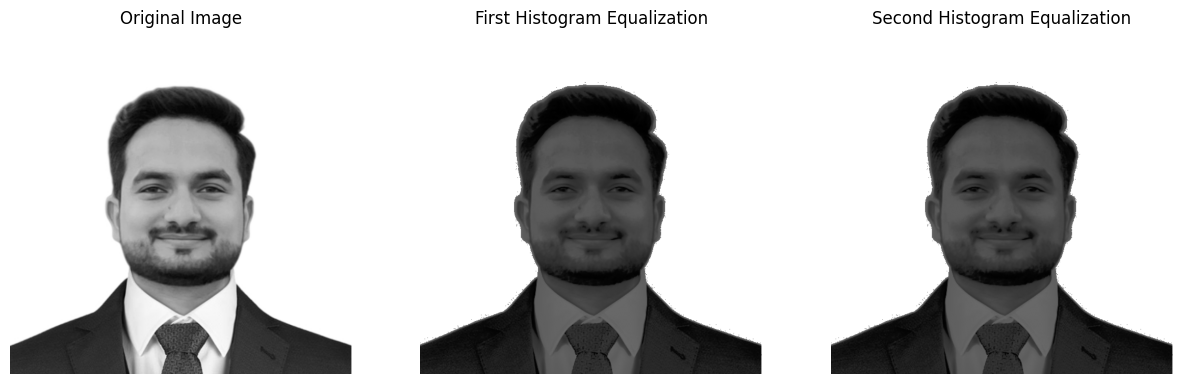

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "/content/KhubaibAfridiFrontEnd.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Histogram Equalization - First time
equalized_img1 = cv2.equalizeHist(img)

# Apply Histogram Equalization - Second time
equalized_img2 = cv2.equalizeHist(equalized_img1)

# Display the original and processed images
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(equalized_img1, cmap='gray')
plt.title("First Histogram Equalization")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(equalized_img2, cmap='gray')
plt.title("Second Histogram Equalization")
plt.axis("off")

plt.show()


# **Scenario no 01 :**

Bit-Plane Slicing for Document Scanning
You are tasked with improving the readability of an old, scanned document. By isolating certain bit-planes, you
can extract text or enhance specific details.

# **Tasks:**
1. Load a grayscale image of a scanned document.
2. Extract and visualize all 8 bit-planes.
3. Combine higher-order bit planes (e.g., 6th, 7th, and 8th) to create a new enhanced image of the document.
4. Compare the original image and the enhanced image.

# **Explanation:**

This code processes a scanned document image to improve its quality using bit-plane slicing. First, it loads the document in grayscale. Then, it separates the image into 8 bit-planes, where each plane represents different levels of detail in the image. Higher bit-planes contain more important details, while lower bit-planes store less useful information. The code then combines the top three bit-planes (5, 6, and 7) to create an enhanced version of the document, making text and important details clearer. Finally, it displays all 8 bit-planes separately and compares the original document with the enhanced document side by side. This method helps improve readability by focusing on the most useful details in the image.

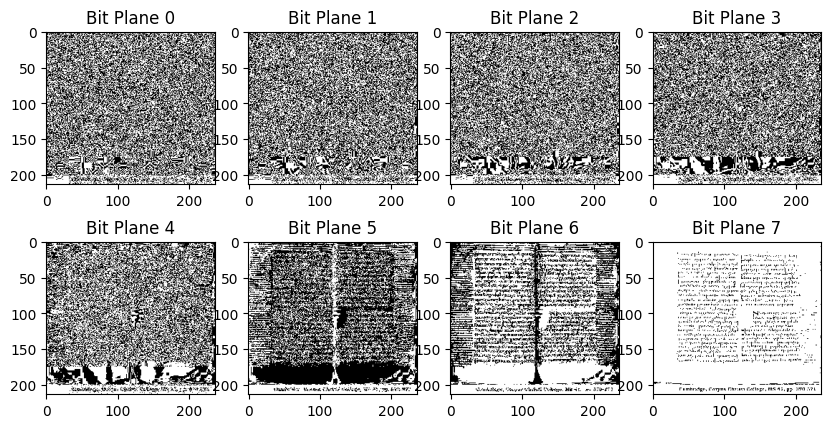

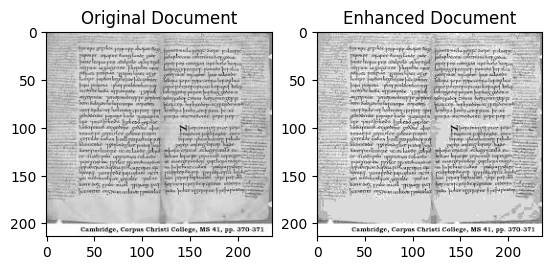

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image of a scanned document
document_img = cv2.imread("/content/Scanerio 01.png", cv2.IMREAD_GRAYSCALE)

def bit_plane_slicing(image):
    bit_planes = [(image >> i) & 1 for i in range(8)]
    combined = (bit_planes[5] * 32 + bit_planes[6] * 64 + bit_planes[7] * 128).astype(np.uint8)
    return bit_planes, combined

bit_planes, enhanced_doc = bit_plane_slicing(document_img)

# Visualize all 8 bit-planes
plt.figure(figsize=(10, 5))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(bit_planes[i] * 255, cmap='gray')
    plt.title(f'Bit Plane {i}')
plt.show()

# Compare original and enhanced images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(document_img, cmap='gray')
plt.title("Original Document")
plt.subplot(1, 2, 2)
plt.imshow(enhanced_doc, cmap='gray')
plt.title("Enhanced Document")
plt.show()


# **Scenario no 02 :**

Histogram Processing for Medical Imaging
Analyze the intensity distribution of a medical image (e.g., an X-ray) to identify underexposed or overexposed
regions.

# **Tasks:**
1. Load a medical image and plot its histogram.
2. Identify whether the image is underexposed, overexposed, or well-balanced.
3. Write a function to enhance the image based on the histogram characteristics (e.g., by stretching intensity
values).

# **Explanation:**

This code processes a grayscale medical image to analyze its brightness distribution and improve its contrast. First, it loads the medical image in grayscale. Then, it calculates the histogram, which shows how pixel intensities are distributed, helping to understand whether the image is too dark, too bright, or has poor contrast. The histogram is plotted as a graph to visualize this distribution.

Next, the code enhances the contrast of the image using histogram equalization, which spreads out the pixel values to make details clearer. Finally, it displays two images side by side: the original medical image and the enhanced image with better contrast. This method is useful for making important details more visible in medical scans.

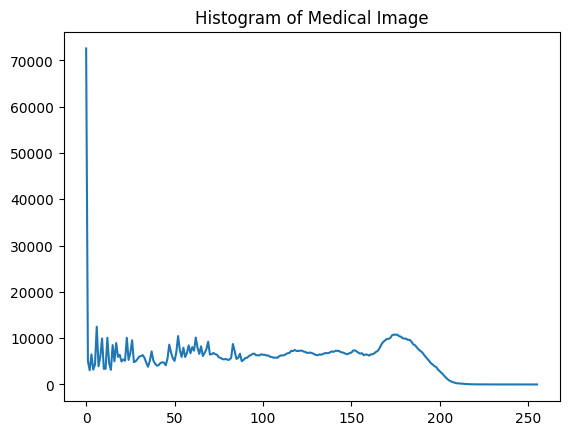

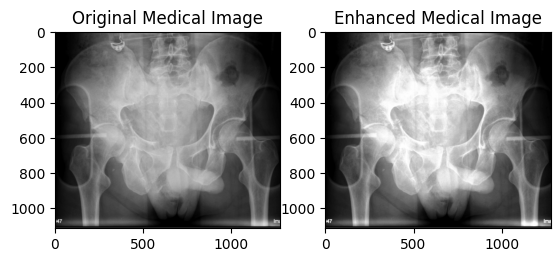

In [ ]:
# Load the grayscale medical image
medical_img = cv2.imread("/content/Scanerio 02.jpg", cv2.IMREAD_GRAYSCALE)

def histogram_analysis(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    return hist

hist = histogram_analysis(medical_img)

# Plot the histogram
plt.figure()
plt.plot(hist)
plt.title("Histogram of Medical Image")
plt.show()

# Function to enhance image contrast
def enhance_contrast(image):
    return cv2.equalizeHist(image)

enhanced_medical = enhance_contrast(medical_img)

# Compare original and enhanced images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(medical_img, cmap='gray')
plt.title("Original Medical Image")
plt.subplot(1, 2, 2)
plt.imshow(enhanced_medical, cmap='gray')
plt.title("Enhanced Medical Image")
plt.show()


# **Scenario 03:**

Global Histogram Equalization for Satellite Imaging
Satellite images are often affected by poor contrast due to atmospheric conditions. Use global histogram
equalization to enhance a satellite image.

# **Tasks:**
1. Load a satellite image.
2. Apply global histogram equalization.
3. Compare the original and equalized images.

# **Explanation:**

This code improves the contrast of a grayscale satellite image using histogram equalization. First, it loads the satellite image in grayscale. Then, it applies histogram equalization, a technique that redistributes pixel intensities to enhance image details, especially in areas with low contrast.

Finally, the code displays two images side by side: the original satellite image and the equalized image. The equalized image usually appears clearer, making important features like land, water, and terrain more visible. This method is commonly used in remote sensing and image analysis to enhance satellite images for better interpretation.

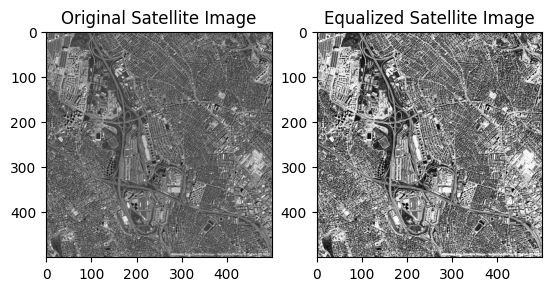

In [ ]:
# Load the grayscale satellite image
satellite_img = cv2.imread("/content/Scanerio 03.jpg", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_satellite = cv2.equalizeHist(satellite_img)

# Compare original and equalized images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(satellite_img, cmap='gray')
plt.title("Original Satellite Image")
plt.subplot(1, 2, 2)
plt.imshow(equalized_satellite, cmap='gray')
plt.title("Equalized Satellite Image")
plt.show()


# **Scenario 04:**

Transformation Functions for Night-Time Image Brightening
You are given a dark night-time photo and asked to brighten it using intensity transformation functions.

# **Tasks:**
1. Apply a logarithmic transformation to brighten the image.
2. Apply a gamma correction to further enhance the image.
3. Compare the results of both transformations.

# **Explanation:**

This code enhances a grayscale night-time image using two different techniques: log transformation and gamma correction.

First, it loads the image in grayscale and checks if it is successfully loaded. If the image is not found, it prints an error message.

Then, it applies log transformation, which makes dark areas brighter while preserving details in bright areas. This is useful for night images where most pixels are dark.

Next, it applies gamma correction, which adjusts brightness non-linearly based on a gamma value (set to 2.0 in this case). This technique is useful for enhancing visibility in dark images.

Finally, the code displays three images side by side:

Original night-time image
Log transformed image (better highlights details in dark regions)
Gamma corrected image (adjusts overall brightness)
Both transformations help improve the visibility of objects in low-light conditions.

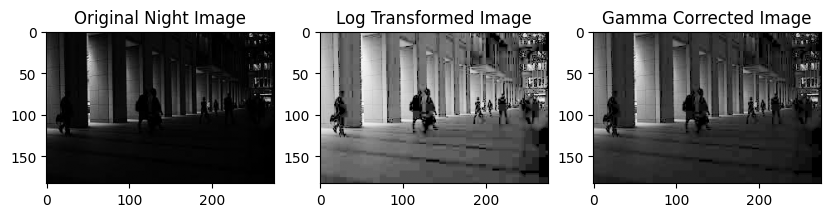

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale night-time image
night_img = cv2.imread("/content/Scanerio 04.jpg", cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if night_img is None:
    print("Error: Image not loaded. Check the file path!")
else:
    def log_transform(image):
        return cv2.normalize(np.log1p(image.astype(np.float32)), None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    def gamma_correction(image, gamma=2.0):
        return np.array(255 * (image / 255) ** (1 / gamma), dtype='uint8')

    # Apply transformations
    log_image = log_transform(night_img)
    gamma_image = gamma_correction(night_img, gamma=2.0)

    # Compare original, log transformed, and gamma corrected images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(night_img, cmap='gray')
    plt.title("Original Night Image")
    plt.subplot(1, 3, 2)
    plt.imshow(log_image, cmap='gray')
    plt.title("Log Transformed Image")
    plt.subplot(1, 3, 3)
    plt.imshow(gamma_image, cmap='gray')
    plt.title("Gamma Corrected Image")
    plt.show()


# **Scenario 05:**

Local Histogram Equalization for Wildlife Photography
Wildlife photographers often face challenges with uneven lighting. Use CLAHE to enhance a wildlife image
taken in uneven lighting.

# **Tasks:**
1. Load a wildlife image.
2. Apply CLAHE with appropriate parameters (clipLimit and tileGridSize).
3. Compare the original and enhanced images.

# **Explanation:**

This code enhances the contrast of a grayscale wildlife image using CLAHE (Contrast Limited Adaptive Histogram Equalization).

First, it loads the image in grayscale. Then, it applies CLAHE, which improves contrast while preventing over-enhancement in very bright or dark areas. CLAHE works by dividing the image into small regions (tiles) and applying histogram equalization separately to each, making hidden details more visible without making the image look unnatural. The clip limit controls how much contrast is enhanced, and the tile grid size determines the number of regions.

Finally, the code displays two images side by side:

Original wildlife image
CLAHE-enhanced image, which has better contrast and improved details, making objects more visible.
This method is especially useful for low-light and high-contrast images, such as wildlife photography taken in shadows or uneven lighting

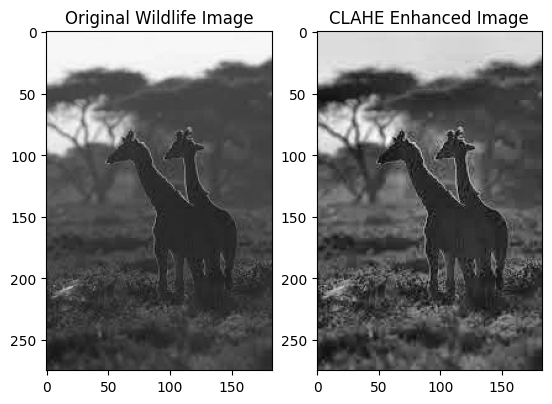

In [ ]:
# Load the grayscale wildlife image
wildlife_img = cv2.imread("/content/Scanerio 05.jpg", cv2.IMREAD_GRAYSCALE)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_wildlife = clahe.apply(wildlife_img)

# Compare original and enhanced images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(wildlife_img, cmap='gray')
plt.title("Original Wildlife Image")
plt.subplot(1, 2, 2)
plt.imshow(enhanced_wildlife, cmap='gray')
plt.title("CLAHE Enhanced Image")
plt.show()
